In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sqlite3

# Connect to Database
con = sqlite3.connect('../data/raw/database.db') 
cur = con.cursor()

In [13]:
# read column names
columns = []
for idx, name, col_type, *args in cur.execute("PRAGMA table_info('listings');").fetchall():
    columns.append(name)
columns[:5]

['user_id', 'id', 'uri', 'title', 'price']

In [10]:
# read table content
sql_query = pd.read_sql('SELECT * FROM listings', con)

# Convert SQL to DataFrame
df = pd.DataFrame(sql_query, columns=columns)

df.head()

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,...,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,...,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,...,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,...,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1672190424,15,0.0,...,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1672253180,2,0.0,...,حي الثقبة,1060,NaN,NaN,None,1420232812,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00


In [38]:
# look at None statistics
df.isna().sum()

user_id                      0
id                           0
uri                          0
title                       21
price                        0
content                    230
imgs                         0
refresh                      0
category                     0
beds                    252609
livings                 252119
wc                      254128
area                       577
type                    502773
street_width             18982
age                     253127
last_update                  0
street_direction         94891
ketchen                 277809
ac                      555898
furnished               238949
location.lat                 0
location.lng                 0
path                         0
user.review             118066
user.img                222565
user.name                 6285
user.phone                   0
user.iam_verified         3714
user.rega_id            338325
native.logo             663944
native.title            663944
native.i

In [51]:
# check unique values of `has_extended_details` column
df[~df['has_extended_details'].isna()]['has_extended_details'].unique()

array([1.])

In [119]:
# find out if rent_period is only filled for rent category (as we can see, no)
print(sorted(df[~df['rent_period'].isna()]['category'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
"""
??type                   502773
??advertiser_type         23932

>age                     253127
>street_width             18982
>street_direction         94891
>width                    57444
>length                   57641

>ac                      555898
>livings                 252119
>furnished               238949
>ketchen                 277809
>wc                      254128
>beds                    252609

>native.logo             663944
>native.title            663944
>native.image            663946
>native.description      663944
>native.external_url     663946
>has_extended_details    653524

>rent_period             571232
>daily_rentable          315493

>user.review             118066
>user.img                222565
>user.rega_id            338325



"""

In [123]:
# find out if daily rentable is only filled for rental=='Daily' (class 2)
df[df['daily_rentable'] == 1]['rent_period'].unique()

array([ 1.,  2., nan,  3.])

0.9296968297430146 correlation rate


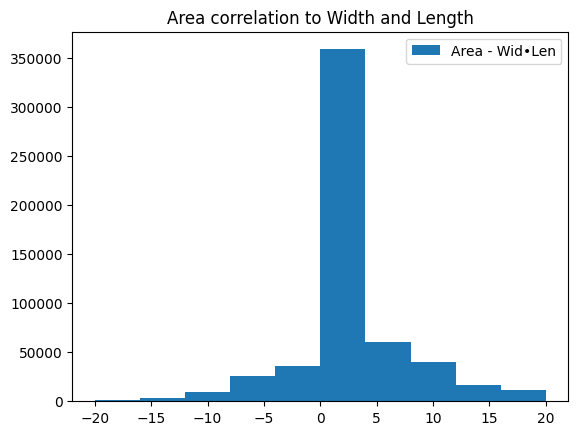

In [253]:
# determine whether width/length correlates to area
d = df[['area', 'width', 'length']].dropna()
counts, bins, *_ = plt.hist(d['area'] - d['width'] * d['length'], range=(-20, 20), bins=10, label='Area - Wid•Len')
plt.title('Area correlation to Width and Length')
plt.legend(prop={'size': 10})
print(sum(counts)/d.shape[0], 'correlation rate')

In [156]:
for column in columns:
    print(f"====== {column} ======")
    u = df[column].unique()
    print(f'Unique: {len(u)}')
    if len(u) < 20:
        try:
            print(f'Unique values: {sorted(u)}')
        except Exception as ex:
            print(f'Unique values: {u}')
    print(df[column].describe())

====== user_id ======
Unique: 94433
count    6.639460e+05
mean     1.377871e+06
std      9.687347e+05
min      7.000000e+00
25%      4.733400e+05
50%      1.236448e+06
75%      2.258472e+06
max      3.412087e+06
Name: user_id, dtype: float64
====== id ======
Unique: 663946
count    6.639460e+05
mean     4.965495e+06
std      4.668850e+05
min      4.331000e+03
25%      4.803458e+06
50%      5.068802e+06
75%      5.272447e+06
max      5.490444e+06
Name: id, dtype: float64
====== uri ======
Unique: 663923
count                                    663946
unique                                   663923
top       شارع-الواحة-حي-الواحة-جدة-جدة-5213525
freq                                          3
Name: uri, dtype: object
====== title ======
Unique: 229138
count                             663925
unique                            229137
top       أرض للبيع في حي الخير ، الرياض
freq                                4528
Name: title, dtype: object
====== price ======
Unique: 34960
count    6.6394

Unique: 97
count     663946
unique        97
top       الرياض
freq      353618
Name: city, dtype: object
====== city_id ======
Unique: 97
count    663946.000000
mean         33.344581
std          22.448531
min           1.000000
25%          21.000000
50%          21.000000
75%          52.000000
max          97.000000
Name: city_id, dtype: float64
====== district ======
Unique: 1103
count        663946
unique         1103
top       حي النرجس
freq          34188
Name: district, dtype: object
====== district_id ======
Unique: 1959
count    663946.000000
mean       1476.007940
std        1274.400611
min           4.000000
25%         570.000000
50%         682.000000
75%        2890.000000
max        4436.000000
Name: district_id, dtype: float64
====== width ======
Unique: 1496
count    6.065020e+05
mean     1.225222e+03
std      6.700092e+05
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.500000e+01
max      5.052330e+08
Name: width, dtype: float64
====== l

In [259]:
df['city'].value_counts()

city
الرياض             353618
جدة                101712
الدمام              36626
الخبر               31023
المدينة المنورة     16412
                    ...  
خيبر                   32
عنك                    24
القريات                20
الوديعة                10
المبرز                  9
Name: count, Length: 97, dtype: int64

In [295]:
df['district'].value_counts()

district
حي النرجس      34188
حي العارض      27849
حي طويق        18269
حي الرمال      17608
حي الملقا      17567
               ...  
حي خلب             1
حي الكرامة         1
حي البدع           1
حي الخصاب          1
حي ابو شجرة        1
Name: count, Length: 1103, dtype: int64

In [280]:
from dateutil import parser

dates = df['createdAt'].apply(parser.parse)

In [292]:
min(dates), max(dates)

(Timestamp('2023-01-01 13:28:57.958000+0000', tz='tzutc()'),
 Timestamp('2023-08-04 18:17:11.007000+0000', tz='tzutc()'))

(array([19358., 19389., 19417., 19448., 19478., 19509., 19539., 19570.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19389.0, 0, '2023-02'),
  Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08')])

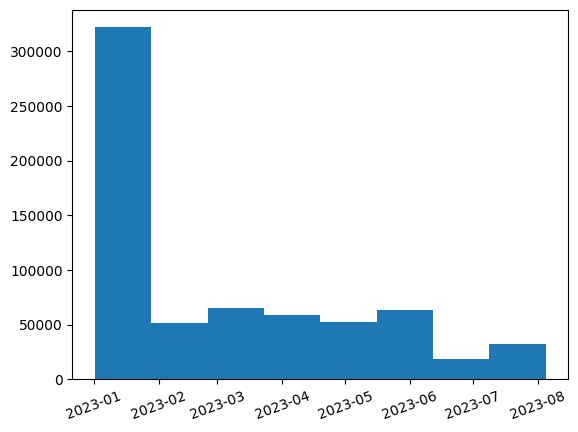

In [291]:
plt.hist(dates, bins=8)
plt.xticks(rotation=20)

Text(0.5, 1.0, 'Price distribution')

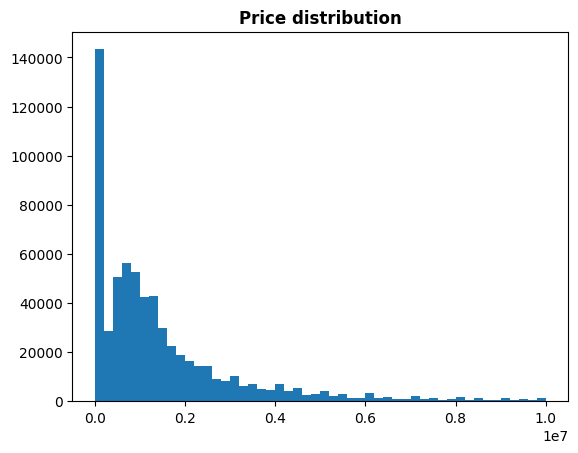

In [221]:
plt.hist(df['price'], range=(0, 1e7), bins=50)
plt.title('Price distribution', fontweight = "bold")

In [294]:
df['advertiser_type'].value_counts()

advertiser_type
normal_marketer       232035
exclusive_marketer    205284
agent                 130706
owner                  71989
Name: count, dtype: int64

In [151]:
df[columns[14:25]].describe()

,street_width,age,last_update,street_direction,ketchen,ac,furnished,location.lat,location.lng,user.review
count,644964.000000,410819.000000,6.639460e+05,569055.000000,386137.000000,108048.000000,424997.000000,663946.000000,663946.000000,545880.000000
mean,21.786455,3.788642,1.676834e+09,3.349681,0.927811,0.540741,0.085208,24.156012,45.158954,4.413296
std,12.929848,7.433565,6.141162e+06,2.292245,0.258802,0.498340,0.279191,2.017924,3.528089,0.523362
min,0.000000,0.000000,1.664775e+09,0.000000,0.000000,0.000000,0.000000,-30.488082,-2.074926,0.000000
25%,15.000000,0.000000,1.672396e+09,1.000000,1.000000,0.000000,0.000000,24.379824,42.598420,4.190000
50%,20.000000,0.000000,1.674833e+09,3.000000,1.000000,1.000000,0.000000,24.764487,46.619579,4.450000
75%,25.000000,5.000000,1.680805e+09,4.000000,1.000000,1.000000,0.000000,24.885044,46.776341,4.770000
max,100.000000,36.000000,1.691173e+09,10.000000,1.000000,1.000000,1.000000,37.506038,51.613487,5.000000


In [152]:
df[columns[25:]].describe()

,user.iam_verified,rent_period,city_id,district_id,width,length,create_time,has_extended_details,daily_rentable
count,660232.000000,92714.000000,663946.000000,663946.000000,6.065020e+05,6.063050e+05,6.639460e+05,10422.0,348453.000000
mean,0.989434,2.690662,33.344581,1476.007940,1.225222e+03,2.100037e+03,1.670964e+09,1.0,0.000732
std,0.102247,0.581426,22.448531,1274.400611,6.700092e+05,1.275984e+06,1.454269e+07,0.0,0.027042
min,0.000000,0.000000,1.000000,4.000000,1.000000e+00,1.000000e+00,1.415294e+09,1.0,0.000000
25%,1.000000,2.000000,21.000000,570.000000,1.200000e+01,1.500000e+01,1.664740e+09,1.0,0.000000
50%,1.000000,3.000000,21.000000,682.000000,1.500000e+01,2.500000e+01,1.673194e+09,1.0,0.000000
75%,1.000000,3.000000,52.000000,2890.000000,2.500000e+01,3.000000e+01,1.680325e+09,1.0,0.000000
max,1.000000,3.000000,97.000000,4436.000000,5.052330e+08,9.876540e+08,1.691173e+09,1.0,1.000000


In [296]:
df['furnished'].value_counts()

furnished
0.0    388784
1.0     36213
Name: count, dtype: int64

In [298]:
df['age'].value_counts()

age
0.0     256182
5.0      13738
1.0      13441
3.0      12882
2.0      12461
10.0     11983
4.0      11323
6.0       9025
7.0       8599
8.0       8314
9.0       5690
15.0      4882
20.0      4726
12.0      4092
30.0      4012
35.0      3445
11.0      3016
25.0      2848
36.0      2817
13.0      2675
14.0      1981
18.0      1786
16.0      1402
17.0      1381
22.0       977
19.0       957
28.0       820
27.0       730
21.0       666
23.0       664
24.0       522
26.0       522
29.0       519
34.0       451
32.0       447
33.0       445
31.0       398
Name: count, dtype: int64

In [299]:
df['ketchen'].value_counts()

ketchen
1.0    358262
0.0     27875
Name: count, dtype: int64